# Experiment: Linear regression and Logit regression

## INTRODUCTION

A supermarket is beginning to offer a line of organic products. The supermarket’s management would like to determine which customers are likely to purchase these products. The supermarket has a customer loyalty program. As an initial buyer incentive plan, the supermarket provided coupons for the organic products to all of their loyalty program participants and has now collected data that includes whether or not these customers have purchased any of the organic products. The dataset ORGANICS contains over 22,000 observations and 18 variables. The variables in the dataset are shown below.

### DATA DESCRIPTION

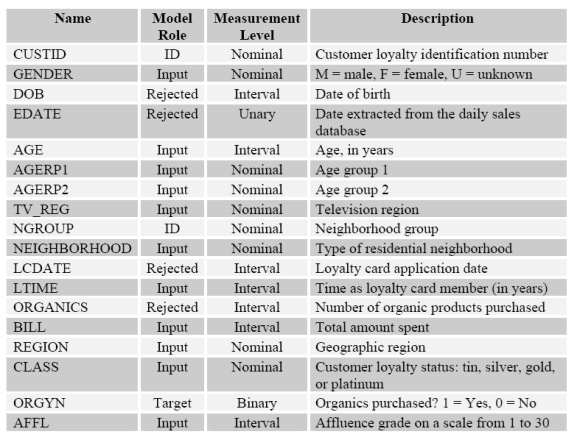

## Procedure

1. Load the csv data using pandas, and look at the first few lines.

In [123]:
import pandas as pd
df=pd.read_csv('02organics.csv')
df.head(100)

,CUSTID,GENDER,DOB,EDATE,AGE,AGEGRP1,AGEGRP2,TV_REG,NGROUP,NEIGHBORHOOD,LCDATE,ORGANICS,BILL,REGION,CLASS,ORGYN,AFFL,LTIME
0,140,U,1921-09-16,1998-02-23,76.0,60-80,70-80,Wales & West,C,16.0,1994-11-07,0.0,16000.00,Midlands,Gold,0.0,10.0,4.0
1,620,U,1949-02-12,1998-02-23,49.0,40-60,40-50,Wales & West,D,35.0,1993-06-04,0.0,6000.00,Midlands,Gold,0.0,4.0,5.0
2,868,F,1927-11-27,1998-02-23,70.0,60-80,70-80,Wales & West,D,27.0,1990-08-02,1.0,0.02,Midlands,Silver,1.0,5.0,8.0
3,1120,M,1932-04-10,1998-02-23,65.0,60-80,60-70,Midlands,F,51.0,1991-07-01,1.0,0.01,Midlands,Tin,1.0,10.0,7.0
4,2313,F,1929-05-21,1998-02-23,68.0,60-80,60-70,Midlands,A,4.0,1990-03-01,0.0,0.01,Midlands,Tin,0.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,168394,F,1962-06-06,1998-02-23,35.0,20-40,30-40,London,F,53.0,1994-03-10,1.0,0.01,South East,Tin,1.0,9.0,4.0
96,170127,M,1947-04-18,1998-02-23,50.0,40-60,50-60,Yorkshire,B,10.0,1988-09-01,0.0,5000.00,North,Silver,0.0,7.0,10.0
97,181498,NaN,1936-03-01,1998-02-23,62.0,60-80,60-70,N West,A,1.0,1969-09-18,0.0,3000.00,North,Silver,0.0,6.0,29.0
98,191396,M,1954-07-19,1998-02-23,NaN,NaN,NaN,Yorkshire,F,51.0,1988-05-31,0.0,0.01,North,Tin,0.0,7.0,10.0


In [65]:
df['REGION']

0          Midlands
1          Midlands
2          Midlands
3          Midlands
4          Midlands
            ...    
22218    South East
22219    South East
22220         North
22221         North
22222    South West
Name: REGION, Length: 22223, dtype: object

In [63]:
one_hot_encoding = df['REGION']
one_hot_encoding = one_hot_encoding.tolist()
one_hot_col = pd.get_dummies(one_hot_encoding)
one_hot_col.head()

,Midlands,North,Scottish,South East,South West
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [93]:
print(df['AGE'].isnull().sum())
print(df['AGEGRP1'].isnull().sum())
print(df['AGEGRP2'].isnull().sum())
print(df[['AGE','AGEGRP1','AGEGRP2']].info())

1508
1508
1508
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      20715 non-null  float64
 1   AGEGRP1  20715 non-null  object 
 2   AGEGRP2  20715 non-null  object 
dtypes: float64(1), object(2)
memory usage: 521.0+ KB
None


In [100]:
df[['NGROUP','NEIGHBORHOOD']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NGROUP        21549 non-null  object 
 1   NEIGHBORHOOD  21549 non-null  float64
dtypes: float64(1), object(1)
memory usage: 347.4+ KB


In [101]:
df.isnull().sum()/len(df)

CUSTID          0.000000
GENDER          0.113036
DOB             0.000000
EDATE           0.000000
AGE             0.067858
AGEGRP1         0.067858
AGEGRP2         0.067858
TV_REG          0.020924
NGROUP          0.030329
NEIGHBORHOOD    0.030329
LCDATE          0.012645
ORGANICS        0.000000
BILL            0.000000
REGION          0.020924
CLASS           0.000000
ORGYN           0.000000
AFFL            0.048823
LTIME           0.012645
dtype: float64

2.The variable **GENDER** has the three values **F, M, and U**, plus missing values. **U** is essentially the same as missing. So replace the missing values for this variable with **U**. You may achieve this by using **fillna()** function.


In [102]:
df['GENDER'].value_counts()

F    12149
M     5815
U     1747
Name: GENDER, dtype: int64

In [103]:
df['GENDER'].fillna('U', inplace=True)

3.Remove some of the unnecessary attributes using **drop()** function

(i) The variables **AGE, AGEGRP1, and AGEGRP2** are all different measurements for the same information. Presume that, based on previous experience, you know that
**AGE** should be used for this type of modeling. Don’t use **AGERP1 and AGERP2**.

In [104]:
# axis=1 means drop the column
df.drop('AGEGRP1',axis=1, inplace=True)
df.drop('AGEGRP2',axis=1, inplace=True)

(ii) The variable **NGROUP** contains collapsed levels of the variable **NEIGHBORHOOD**. Therefore, only one of these attributes should be used in a model. Presume that, based on previous experience; you know that NGROUP is sufficient for this type of modeling. Don’t use **NEIGHBORHOOD** rejected.

In [105]:
df.drop('NEIGHBORHOOD',axis=1,inplace=True)

(iii) The variable **LCDATE** and **LTIME** essentially measure the same thing. Let’s keep **LTIME** as an input attribute and remove **LCDATE** 

In [106]:
df.drop('LCDATE',axis=1,inplace=True)

(v) The variable **ORGANICS** contains information that would not be known at the time you are developing a model to predict the purchase of organic products. Please remove **ORGANICS**.

In [107]:
df.drop('ORGANICS',axis=1,inplace=True)

In [108]:
# we can see how the dataset looks like now
df.head()

,CUSTID,GENDER,DOB,EDATE,AGE,TV_REG,NGROUP,BILL,REGION,CLASS,ORGYN,AFFL,LTIME
0,140,U,1921-09-16,1998-02-23,76.0,Wales & West,C,16000.00,Midlands,Gold,0.0,10.0,4.0
1,620,U,1949-02-12,1998-02-23,49.0,Wales & West,D,6000.00,Midlands,Gold,0.0,4.0,5.0
2,868,F,1927-11-27,1998-02-23,70.0,Wales & West,D,0.02,Midlands,Silver,1.0,5.0,8.0
3,1120,M,1932-04-10,1998-02-23,65.0,Midlands,F,0.01,Midlands,Tin,1.0,10.0,7.0
4,2313,F,1929-05-21,1998-02-23,68.0,Midlands,A,0.01,Midlands,Tin,0.0,11.0,8.0


4.We can use **isnull()** function to check whether the missing values exist, and use **sum()** to summarize them. Here's the code that calculates the ratio of missing values in each column.

In [109]:
df_na=(df.isnull().sum()/len(df))*100
df_na=pd.DataFrame({'MissingRatio':df_na})
df_na

,MissingRatio
CUSTID,0.000000
GENDER,0.000000
DOB,0.000000
EDATE,0.000000
AGE,6.785762
TV_REG,2.092427
NGROUP,3.032894
BILL,0.000000
REGION,2.092427
CLASS,0.000000


5.After these preprocessing, you may notice that there are still missing values for some of the attributes. But the missing rate is not high. Therefore, in this tutorial, you only need to remove records with missing value instead of input missing values for them. We can achieve this by using **dropna()** method.

In [110]:
# remove the missing value
df.dropna(axis=0,inplace=True) # axis=0 means drop the row with NA
# check whether we have missing value now
df_na=(df.isnull().sum()/len(df))*100
df_na=pd.DataFrame({'MissingRatio':df_na})
df_na

,MissingRatio
CUSTID,0.0
GENDER,0.0
DOB,0.0
EDATE,0.0
AGE,0.0
TV_REG,0.0
NGROUP,0.0
BILL,0.0
REGION,0.0
CLASS,0.0


6.One Hot Encoding: For category variables, if there is no significance between values of discrete features, then different categories need to be transformed into 0-1 numeric vectors. For each row, the column of its class is 1, and the rest of the columns are 0.

We can use **get_dummies()** method in pandas to achieve this.

In [111]:
def dummies(data, col_name):
    col_dummies = pd.get_dummies(data[col_name], prefix=col_name)
    data.drop(col_name,axis=1,inplace=True)
    data = pd.concat([data, col_dummies], axis=1)
    return data

col_dummies = ['GENDER','TV_REG','NGROUP','REGION','CLASS']
for i in col_dummies:
    df = dummies(df, i)

In [112]:
df.head()

,CUSTID,DOB,EDATE,AGE,BILL,ORGYN,AFFL,LTIME,GENDER_F,GENDER_M,...,NGROUP_U,REGION_Midlands,REGION_North,REGION_Scottish,REGION_South East,REGION_South West,CLASS_Gold,CLASS_Platinum,CLASS_Silver,CLASS_Tin
0,140,1921-09-16,1998-02-23,76.0,16000.00,0.0,10.0,4.0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,620,1949-02-12,1998-02-23,49.0,6000.00,0.0,4.0,5.0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,868,1927-11-27,1998-02-23,70.0,0.02,1.0,5.0,8.0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1120,1932-04-10,1998-02-23,65.0,0.01,1.0,10.0,7.0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2313,1929-05-21,1998-02-23,68.0,0.01,0.0,11.0,8.0,1,0,...,0,1,0,0,0,0,0,0,0,1


We can see that the categorical variables have been changed into one-hot vector.

7.train and test set split: as the Linear Regression and Logistic Regression both belongs to supervised learning, the dataset should be split into train and test set.Notice: only the numeric variables can be put into the linear regression model. In this dataset, we can use the following features for prediction: AGE, BILL, AFFL, LTIME.

In [113]:
from sklearn.model_selection import train_test_split
# drop the typeless column
df.drop('CUSTID',axis=1,inplace=True) 
df.drop('DOB',axis=1,inplace=True)
df.drop('EDATE',axis=1,inplace=True)

y = df['ORGYN']
X = df.drop('ORGYN',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [114]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(11106, 35) (7404, 35)
(11106,) (7404,)


8.Import **sklearn** module for data modeling,fit a Linear Regression Model, and observe the results using **intercept_** and **coef_**. 

In [115]:
from sklearn import linear_model
import numpy as np



model = linear_model.LinearRegression()
model.fit(X_train, y_train)
display(model.intercept_)  # the intercept of the regression model
display(model.coef_)  # the coefficients of the regression model

0.2929675561493843

array([-8.10600697e-03,  5.47252156e-07,  3.88542725e-02,  1.13684672e-03,
        1.17709527e-01, -2.19023107e-02, -9.58072160e-02,  1.46834557e-02,
       -4.88635059e-03,  1.06984569e-02,  1.90551788e-03, -6.97308980e-03,
        1.13941990e-02, -1.52924542e-02, -2.06898906e-02, -5.79760001e-03,
        1.49907402e-02,  2.86631214e-03, -2.89929656e-03,  1.65346748e-02,
       -1.07990293e-02, -1.24335300e-02, -8.37469841e-04, -5.56144010e-06,
       -3.50103970e-03,  1.10419555e-02,  6.59167922e-03, -1.21949882e-02,
       -5.49534912e-03, -3.89208213e-03,  1.49907402e-02,  1.64809546e-02,
       -3.08706997e-02,  6.08063645e-03,  8.30910865e-03])

9.We can use **matplotlib** module for visualization. Draw a plot with “estimated ORGYN” against “ORGYN”, observe the graph.

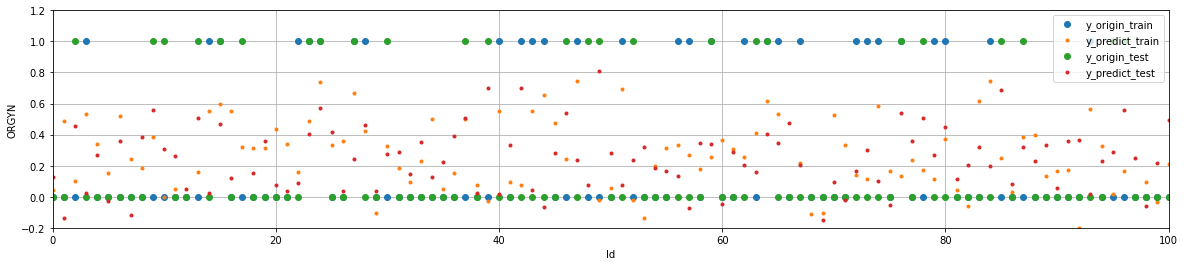

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.axis([0, 100, -0.2, 1.2]) # show the first 100 ones
plt.grid(True)

y_origin_train = np.array(y_train)
y_pred_train = model.predict(X_train)
y_origin_test = np.array(y_test)
y_pred_test = model.predict(X_test)
plt.xlabel('Id')
plt.ylabel('ORGYN')
plt.plot(y_origin_train, 'o', label="y_origin_train")
plt.plot(y_pred_train, '.', label="y_predict_train")
plt.plot(y_origin_test, 'o', label="y_origin_test")
plt.plot(y_pred_test, '.', label="y_predict_test")
plt.legend()
plt.show()

9.Fit a Logistic Regression Model, the operation is similar to linear regression.

In [117]:
model1 = linear_model.LogisticRegression()
model1.fit(X_train, y_train)
display(model1.intercept_)  # the intercept of the regression model
display(model1.coef_)  # the coefficients of the regression model

C:\Users\toyou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-0.32240315])

array([[-6.05926697e-02, -8.92466706e-06,  2.47165196e-01,
         8.67812385e-03,  7.84272095e-01, -1.31031710e-01,
        -9.75284816e-01,  2.59029738e-03, -1.86892314e-02,
         3.78903800e-02, -6.05450145e-02, -6.11377979e-02,
         4.43324229e-03, -2.55948053e-02, -1.58498978e-01,
        -4.47115775e-02,  6.22936726e-02, -1.99050338e-02,
        -4.01695844e-02,  9.09597701e-02, -7.28163162e-02,
        -1.34687199e-01, -3.67761885e-02, -2.57750594e-02,
        -1.41329302e-01, -1.62013495e-03, -4.31524518e-02,
        -1.94235320e-01, -4.16937393e-02, -1.05256592e-01,
         6.22936726e-02,  1.30378323e-01, -5.65902985e-02,
        -1.57279209e-01, -2.38553245e-01]])

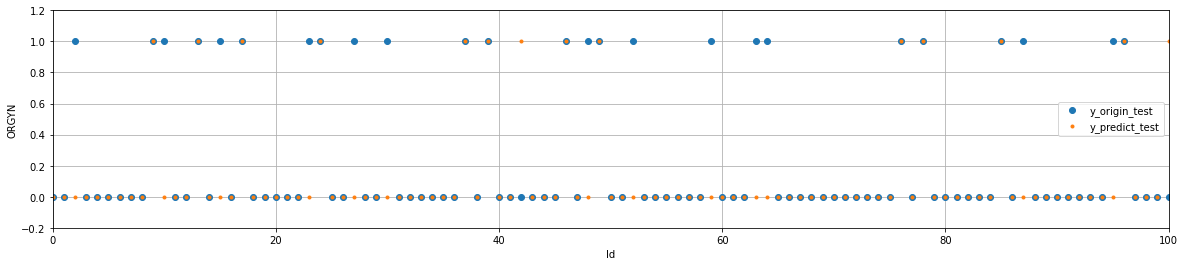

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.axis([0, 100, -0.2, 1.2]) # show the first 100 ones
plt.grid(True)

y1_pred = model1.predict(X_test)
plt.xlabel('Id')
plt.ylabel('ORGYN')
plt.plot(y_origin_test, 'o', label="y_origin_test")
plt.plot(y1_pred, '.', label="y_predict_test")
plt.legend()
plt.show()

10.Evaluate the performance.

Evaluate Linear regression model using different matrics. (All these matrics can be found in sklearn)
* MSE (mean squared error)
* MAE (mean absolute error)
* R2

In [119]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 

LinearMSE = mean_squared_error(y_origin_test,y_pred_test)
LinearMAE = mean_absolute_error(y_origin_test,y_pred_test)
LinearR2 = r2_score(y_origin_test,y_pred_test)

result = pd.DataFrame([[LinearMSE, LinearMAE, LinearR2]], index=['Linear Regression'],
                  columns=['MSE', 'MAE', 'LinearR2'])
print(result)

                        MSE       MAE  LinearR2
Linear Regression  0.140007  0.299064  0.237687


Evaluate Logistic regression model using confusion matrix

In [120]:
# check the cofusion matrix
from sklearn.metrics import confusion_matrix
C=confusion_matrix(y_origin_test, y1_pred)
print(C)

[[5285  324]
 [1047  748]]


In [121]:
accuracy = (759 + 5291) / (5291 + 319 + 1035 + 759)
precision = 759 / (759 + 319)
recall = 759 / (759 + 1035)
fscore = 2 * (precision * recall) / (precision + recall)
accuracy, precision, recall, fscore

(0.8171258779038357,
 0.7040816326530612,
 0.4230769230769231,
 0.5285515320334261)

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_origin_test, y1_pred)
precision = precision_score(y_origin_test, y1_pred)
recall = recall_score(y_origin_test, y1_pred)
fscore = f1_score(y_origin_test, y1_pred)

accuracy, precision, recall, fscore

(0.8148298217179902,
 0.6977611940298507,
 0.41671309192200556,
 0.521799790722009)